In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Rikos ja rangaistus,1983
1,The Day of the Broken,2014
2,Bug Off!,2001
3,Hell's Highroad,1925
4,Like Night and Day,1998


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

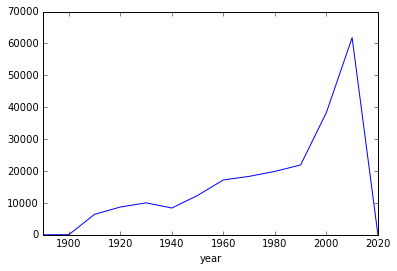

In [5]:
tmp=titles.copy(); tmp.year = tmp.year // 10 * 10;
tmp.groupby('year').size().plot()
del tmp

### Use groupby() to plot the number of "Hamlet" films made each decade.

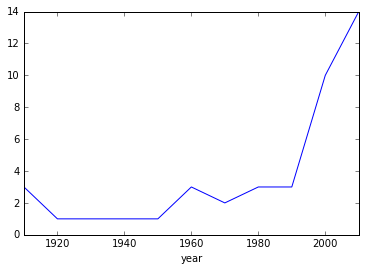

In [9]:
tmp = titles.loc[titles.title.str.startswith("Hamlet")].copy();
tmp.year = tmp.year // 10 * 10
tmp.groupby('year').size().plot()
del tmp

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [22]:
cast.loc[(cast.n == 1) & (cast.year // 10 == 195)].groupby(['type','year']).size()

type     year
actor    1950    615
         1951    643
         1952    598
         1953    641
         1954    635
         1955    620
         1956    631
         1957    716
         1958    703
         1959    692
actress  1950    277
         1951    275
         1952    288
         1953    294
         1954    303
         1955    272
         1956    296
         1957    291
         1958    280
         1959    305
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [29]:
cast.loc[(cast.n >= 1) & (cast.n <= 5) & (cast.year // 10 == 195)].groupby('type').size()

type
actor      27441
actress    15749
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [37]:
cast.loc[cast.title.str.contains('Pink Panther')].groupby('character').size().size

412

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [47]:
tmp = cast.loc[cast.name == 'Frank Oz'].groupby(['year','title']).size();
print(tmp[ tmp > 1 ])
del tmp

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64


### List each of the characters that Frank Oz has portrayed at least twice.

In [51]:
tmp = cast.loc[cast.name == 'Frank Oz'].groupby('character').size();
print(tmp[tmp>=2])
del tmp

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64
